In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("C:\\Users\\ss987\\OneDrive\\Desktop\\Data\\Googleplaystore4.csv")
df.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [82]:
df.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [83]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [84]:
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df["Type"] = df["Type"].fillna("Free")
df["Content Rating"] = df["Content Rating"].fillna("Unknown")
df["Current Ver"] = df["Current Ver"].fillna("Unknown")
df["Android Ver"] = df["Android Ver"].fillna("Unknown")

In [85]:
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

In [86]:
print(df["Reviews"].unique())

[1.59000e+02 9.67000e+02 8.75100e+04 ... 6.03000e+02 1.19500e+03
 3.98307e+05]


In [87]:
print(df["Installs"].unique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [88]:
df["Installs"] = df["Installs"].str.replace("[+,]", "", regex=True)

In [89]:
print(df["Installs"].unique())

['10000' '500000' '5000000' '50000000' '100000' '50000' '1000000'
 '10000000' '5000' '100000000' '1000000000' '1000' '500000000' '50' '100'
 '500' '10' '1' '5' '0' 'Free']


In [90]:
df["Installs"] = df["Installs"].replace(["Free", "", "0"], pd.NA)

In [91]:
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

In [92]:
installs_mean = df["Installs"].mean()
df["Installs"] = df["Installs"].fillna(installs_mean)

In [93]:
print(df["Installs"].unique())

[1.00000000e+04 5.00000000e+05 5.00000000e+06 5.00000000e+07
 1.00000000e+05 5.00000000e+04 1.00000000e+06 1.00000000e+07
 5.00000000e+03 1.00000000e+08 1.00000000e+09 1.00000000e+03
 5.00000000e+08 5.00000000e+01 1.00000000e+02 5.00000000e+02
 1.00000000e+01 1.00000000e+00 5.00000000e+00 1.54857675e+07]


In [94]:
print(df["Price"].unique())

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [95]:
df["Price"] = df["Price"].str.replace("[$]", "", regex=True)
df["Price"] = df["Price"].str.replace("Everyone", "0", regex=True).astype(float)

In [96]:
print(df["Price"].unique())

[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99
  74.99  39.99   3.95   4.49   1.7    8.99   2.     3.88  25.99 399.99
  17.99 400.     3.02   1.76   4.84   4.77   1.61   2.5    1.59   6.49
   1.29   5.    13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49
   1.75  14.     4.85  46.99 109.99 154.99   3.08   2.59   4.8    1.96
  19.4    3.9    4.59  15.46   3.04   4.29   2.6    3.28   4.6   28.99
   2.95   2.9    1.97 200.    89.99   2.56  30.99   3.61 394.99   1.26
   1.2    1.04]


In [97]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [98]:
def convert_size(size):
    if "M" in size:
        return float(size.replace("M", ""))  # Convert MB
    elif "K" in size:
        return float(size.replace("K", "")) / 1024  # Convert KB to MB
    else:
        return None  # Handle "Varies with device" as NaN

In [99]:
df["Size"] = df["Size"].apply(lambda x: convert_size(str(x)))

In [100]:
print(df["Size"].unique())

[ 19.   14.    8.7  25.    2.8   5.6  29.   33.    3.1  28.   12.   20.
  21.   37.    2.7   5.5  17.   39.   31.    4.2   7.   23.    6.    6.1
   4.6   9.2   5.2  11.   24.    nan   9.4  15.   10.    1.2  26.    8.
   7.9  56.   57.   35.   54.    3.6   5.7   8.6   2.4  27.    2.5  16.
   3.4   8.9   3.9   2.9  38.   32.    5.4  18.    1.1   2.2   4.5   9.8
  52.    9.    6.7  30.    2.6   7.1   3.7  22.    7.4   6.4   3.2   8.2
   9.9   4.9   9.5   5.    5.9  13.   73.    6.8   3.5   4.    2.3   7.2
   2.1  42.    7.3   9.1  55.    6.5   1.5   7.5  51.   41.   48.    8.5
  46.    8.3   4.3   4.7   3.3  40.    7.8   8.8   6.6   5.1  61.   66.
   8.4  44.    1.6   6.2  53.    1.4   3.    5.8   3.8   9.6  45.   63.
  49.   77.    4.4   4.8  70.    6.9   9.3   8.1  36.   84.   97.    2.
   1.9   1.8   5.3  47.   76.    7.6  59.    9.7  78.   72.   43.    7.7
   6.3  34.   93.   65.   79.  100.   58.   50.   68.   64.   67.   60.
  94.   99.   95.   80.    1.7  74.   62.   69.   75.   98

In [101]:
df["Size"].fillna(df["Size"].mean(), inplace=True)
df["Reviews"].fillna(df["Reviews"].mean(), inplace=True)

C:\Users\ss987\AppData\Local\Temp\ipykernel_11716\1865358376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Size"].fillna(df["Size"].mean(), inplace=True)
C:\Users\ss987\AppData\Local\Temp\ipykernel_11716\1865358376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [102]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [103]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")

In [104]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [105]:
df.duplicated().sum()

483

In [106]:
df = df.drop_duplicates()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          10358 non-null  float64       
 3   Reviews         10358 non-null  float64       
 4   Size            10358 non-null  float64       
 5   Installs        10358 non-null  float64       
 6   Type            10358 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content Rating  10358 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10358 non-null  object        
 12  Android Ver     10358 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [108]:
df["Type"] = df["Type"].str.replace("0", "Free", regex=True)

In [109]:
df["Rating"] = df["Rating"].replace(19,1.9)
df["Rating"] = df["Rating"].replace(5,4.8)

In [110]:
df["Rating"] = df["Rating"].apply(lambda x: float(f"{x:.2f}"))

In [111]:
print(df["Rating"].unique())

[4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   4.19 4.8  4.9
 3.6  3.7  3.3  3.4  3.5  3.1  2.6  3.   1.9  2.5  2.8  2.7  1.   2.9
 2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 ]


In [112]:
df["Rating"].unique()

array([4.1 , 3.9 , 4.7 , 4.5 , 4.3 , 4.4 , 3.8 , 4.2 , 4.6 , 3.2 , 4.  ,
       4.19, 4.8 , 4.9 , 3.6 , 3.7 , 3.3 , 3.4 , 3.5 , 3.1 , 2.6 , 3.  ,
       1.9 , 2.5 , 2.8 , 2.7 , 1.  , 2.9 , 2.3 , 2.2 , 1.7 , 2.  , 1.8 ,
       2.4 , 1.6 , 2.1 , 1.4 , 1.5 , 1.2 ])

In [113]:
df["Category"] = df["Category"].str.replace("_", " ").str.title()

In [114]:
df["Category"].unique()

array(['Art And Design', 'Auto And Vehicles', 'Beauty',
       'Books And Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food And Drink', 'Health And Fitness', 'House And Home',
       'Libraries And Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel And Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players', 'News And Magazines', 'Maps And Navigation',
       '1.9'], dtype=object)

In [115]:
df = df[df['Category'] != '1.9']

In [116]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [117]:
numeric_features = [features for features in df.columns if df[features].dtype !="O" ]
categorical_features = [features for features in df.columns if df[features].dtype =="O"]

print ("We have{} numerical features : {}".format (len(numeric_features), numeric_features))
print ("\nWe have{} categorical features : {}".format (len(categorical_features), categorical_features))

We have6 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']

We have7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [118]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("-")

App
ROBLOX                                           0.086898
8 Ball Pool                                      0.067587
Bubble Shooter                                   0.057932
Helix Jump                                       0.057932
Zombie Catchers                                  0.057932
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.009655
PixelLab - Text on pictures                      0.009655
P Launcher for Android™ 9.0                      0.009655
Pacify (Android P theme) - Theme for Xperia™     0.009655
iHoroscope - 2018 Daily Horoscope & Astrology    0.009655
Name: proportion, Length: 9659, dtype: float64
-
Category
Family                 18.760259
Game                   10.823598
Tools                   8.139423
Business                4.122815
Medical                 3.939365
Productivity            3.929709
Personalization         3.746259
Lifestyle               3.601429
Communication           3.533842
Fin

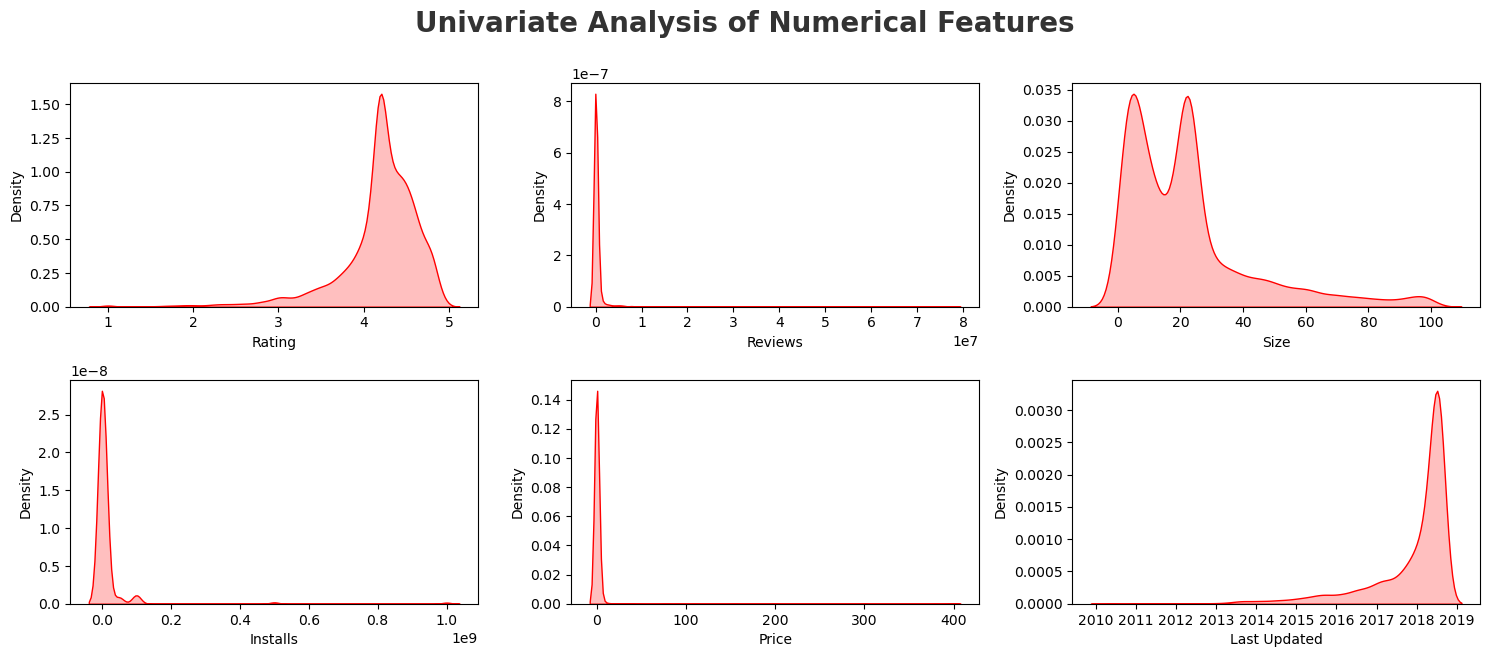

In [119]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True,color="r")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

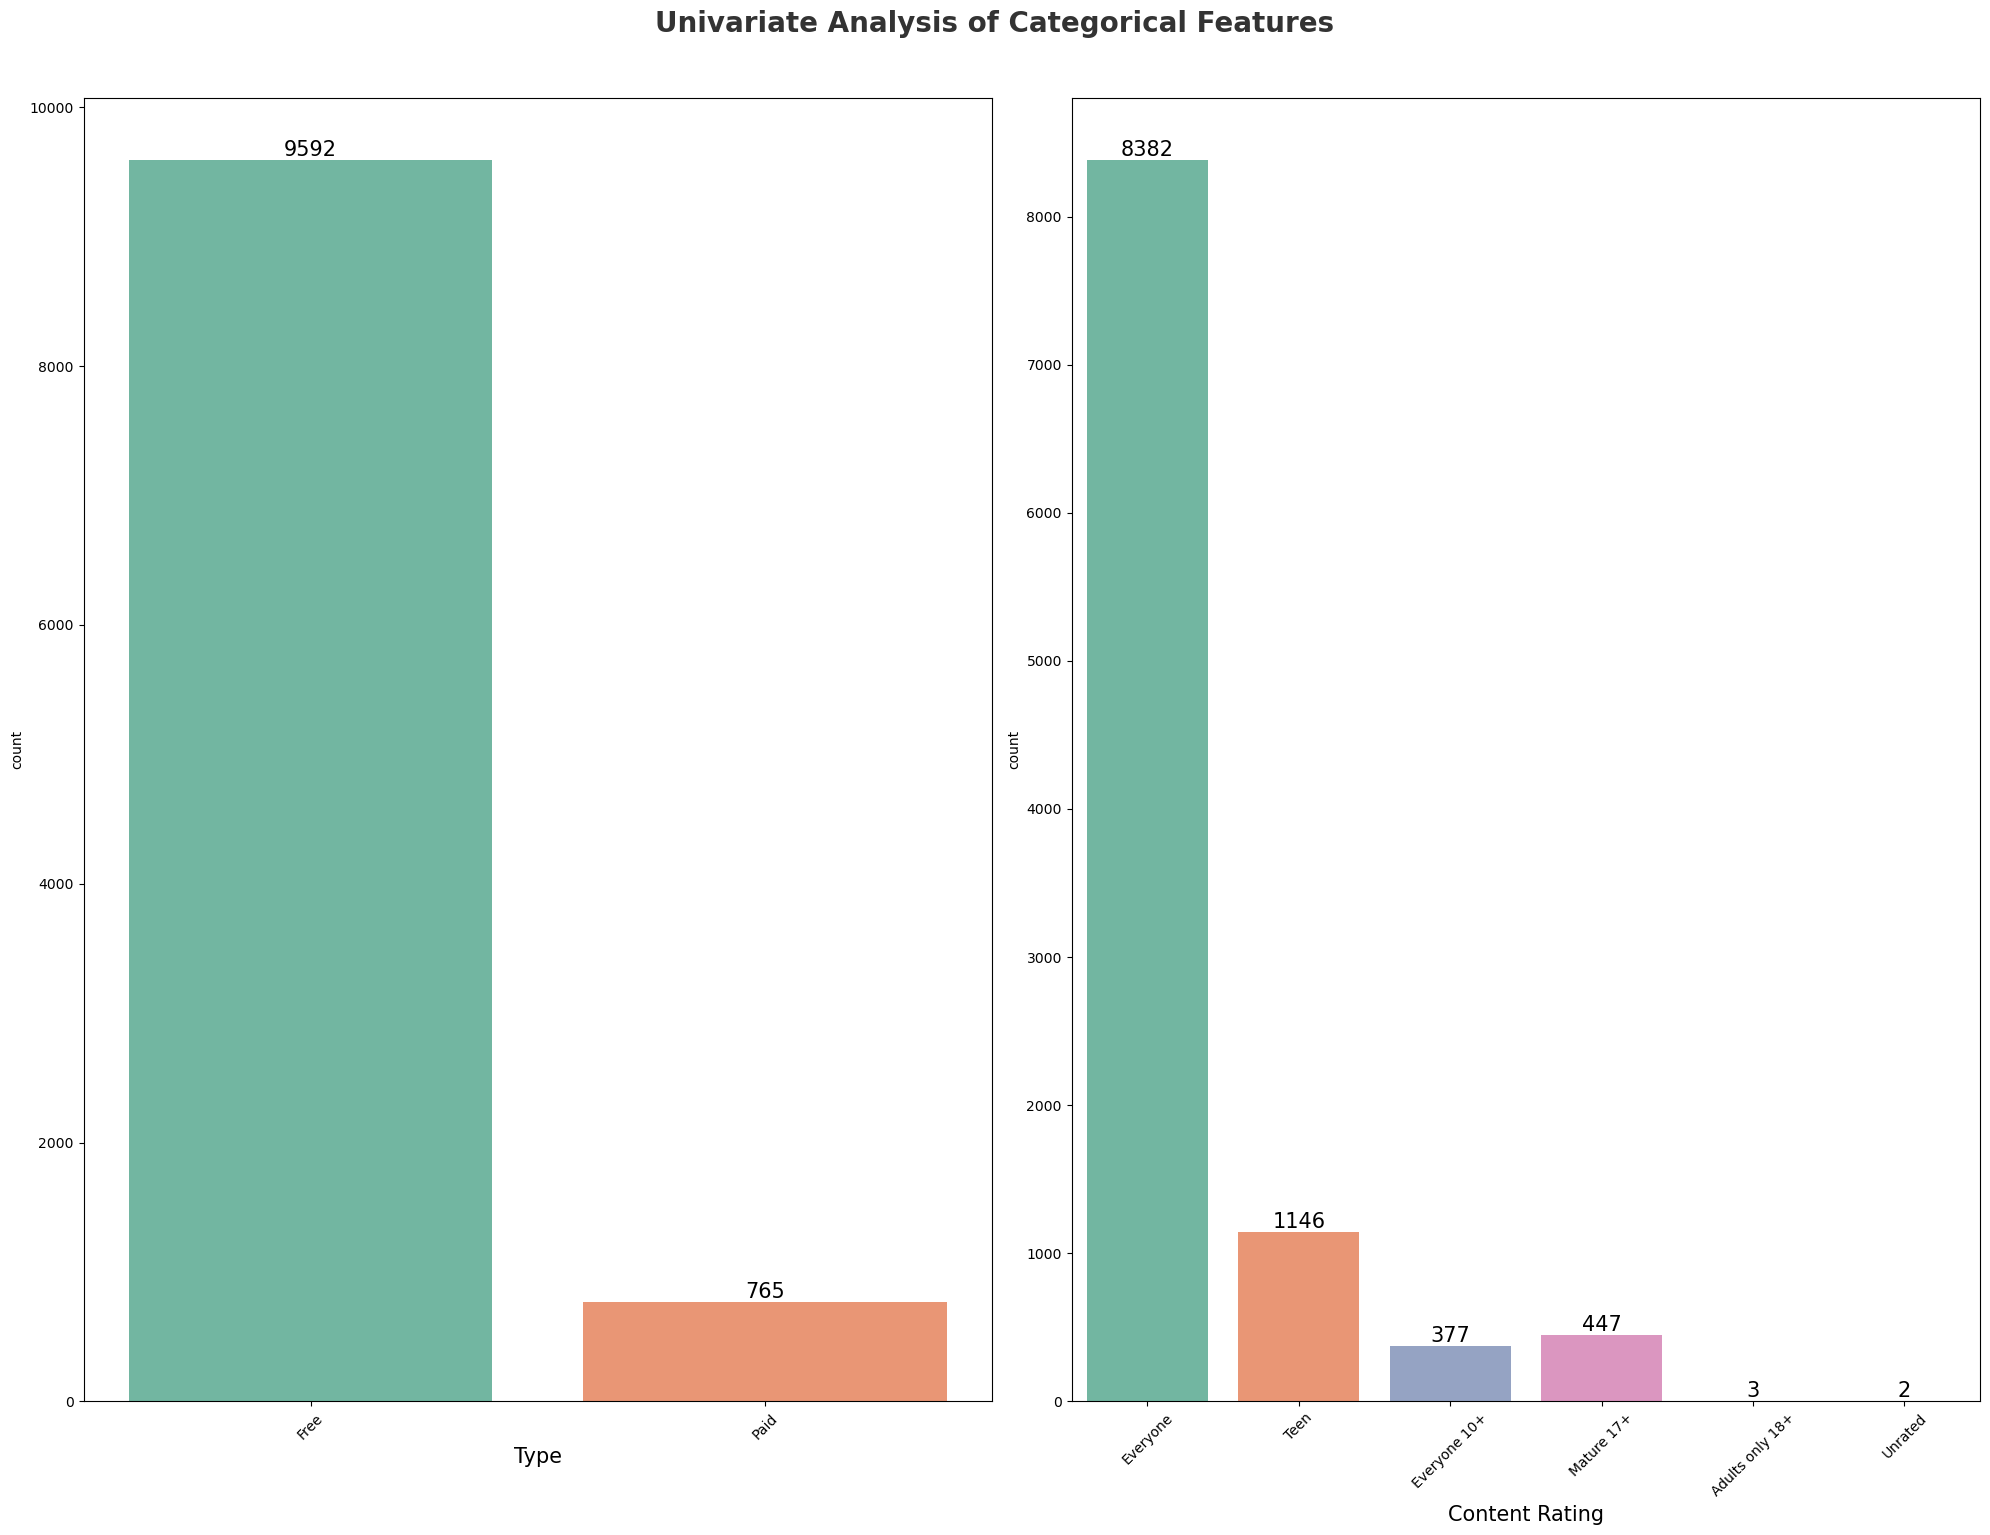

In [120]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# List of categorical features
category = ['Type', 'Content Rating']

# Loop through the categories and create subplots
for i in range(len(category)):
    plt.subplot(1, 2, i+1)  # 1 row, 2 columns
    ax = sns.countplot(x=df[category[i]], hue=df[category[i]], palette="Set2", legend=False)
    plt.xlabel(category[i], fontsize=15)
    plt.xticks(rotation=45)
    
    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fontsize=15)
    
    plt.tight_layout()

# Display the plot
plt.show()

<Axes: ylabel='count'>

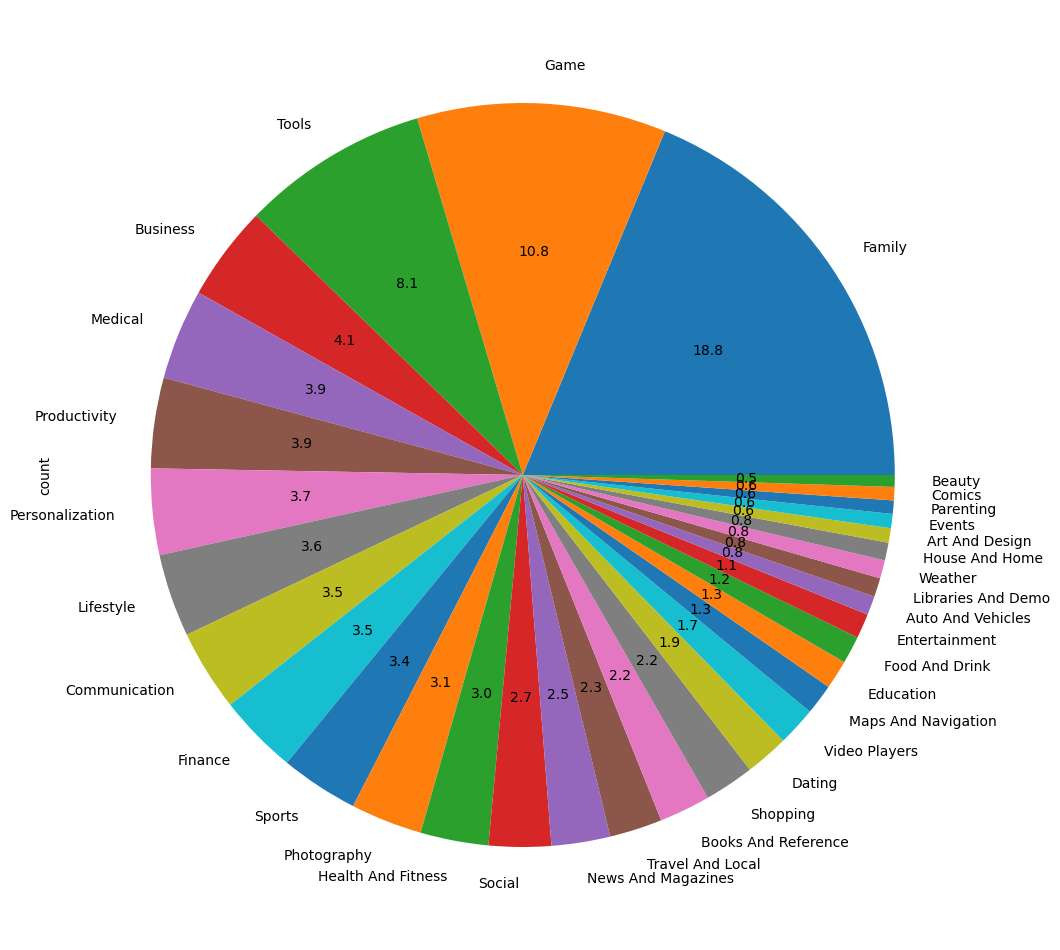

In [121]:
df["Category"].value_counts().plot.pie(y=df["Category"],figsize=(12,20),autopct="%1.1f")

In [122]:
category = pd.DataFrame(df["Category"].value_counts())
category.rename(columns = {"Category":"Count"},inplace=True)
category

,count
Category,
Family,1943
Game,1121
Tools,843
Business,427
Medical,408
Productivity,407
Personalization,388
Lifestyle,373
Communication,366


C:\Users\ss987\AppData\Local\Temp\ipykernel_11716\1815796490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Category", y="Count", data=category[:10], palette="hls")


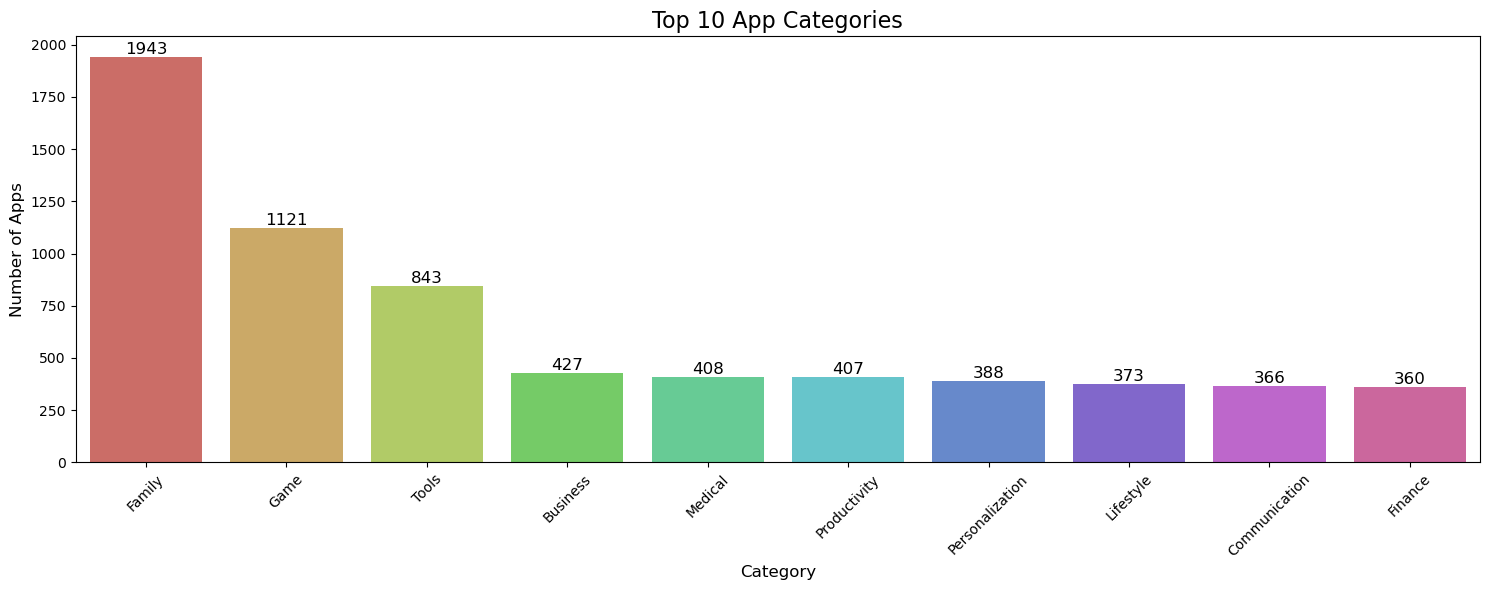

In [124]:
category = df['Category'].value_counts().reset_index()
category.columns = ['Category', 'Count']

plt.figure(figsize=(15,6))
ax = sns.barplot(x="Category", y="Count", data=category[:10], palette="hls")

plt.title("Top 10 App Categories", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Apps", fontsize=12)

plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.tight_layout()
plt.show()


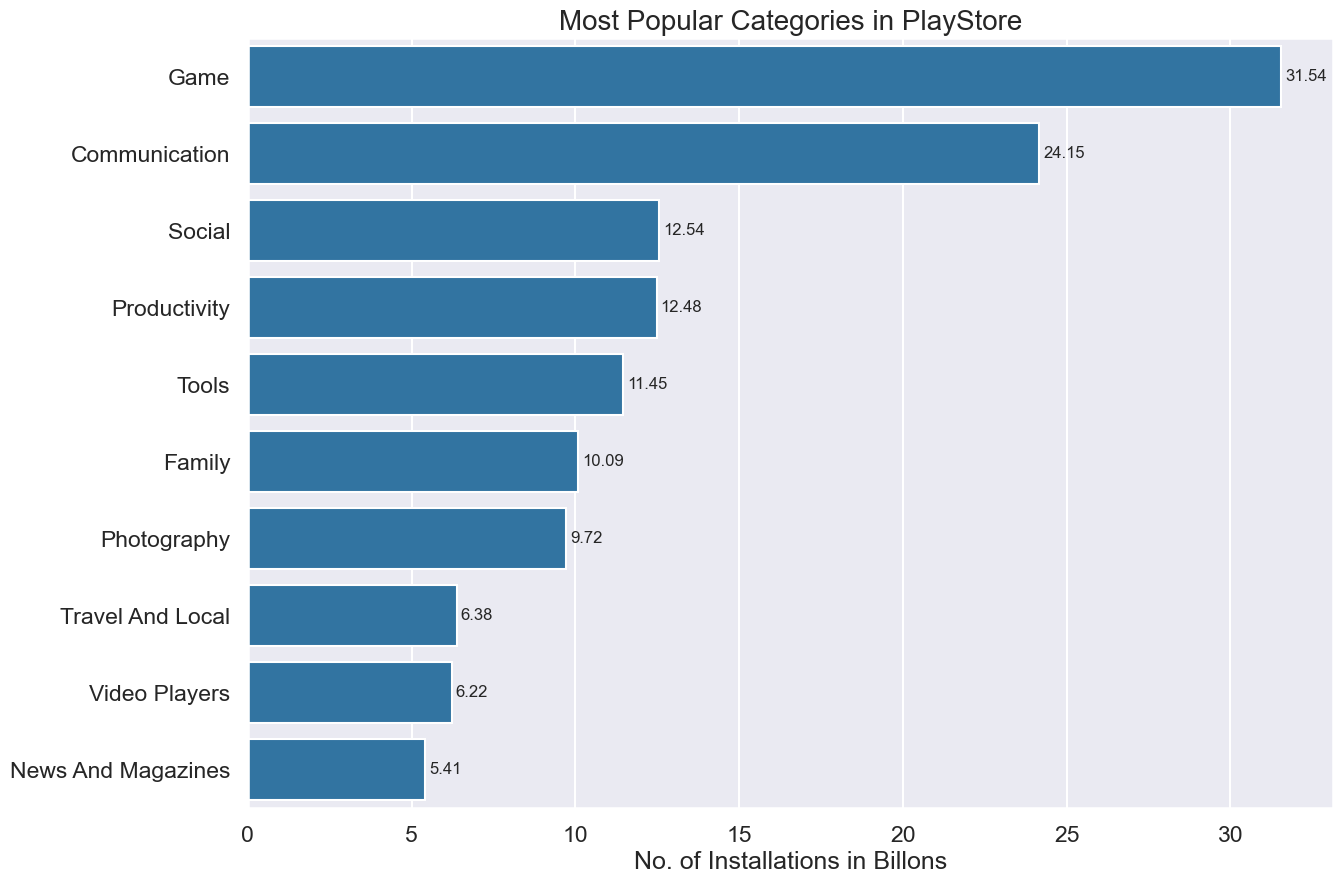

In [126]:
df_cat_installs = df.groupby(["Category"])["Installs"].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000#
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = "Installs", y = "Category", data = df2)
ax.set_xlabel("No. of Installations in Billons")
ax.set_ylabel("")
ax.set_title("Most Popular Categories in PlayStore",size = 20)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3, fontsize=12)
plt.show()

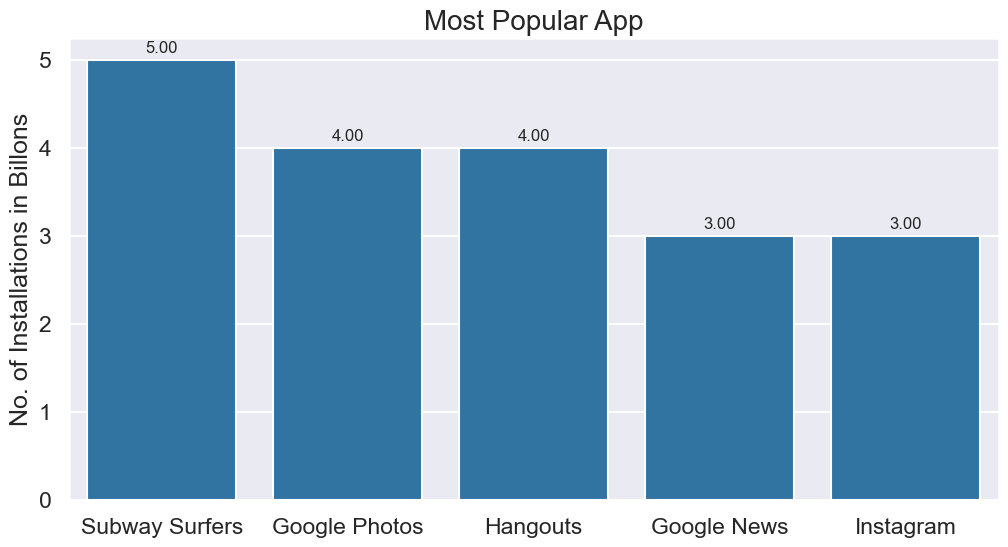

In [128]:
df_cat_installs = df.groupby(["App"])["Installs"].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000#
df2 = df_cat_installs.head(5)
plt.figure(figsize = (12,6))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = "App", y = "Installs", data = df2)
ax.set_xlabel("")
ax.set_ylabel("No. of Installations in Billons")
ax.set_title("Most Popular App",size = 20)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3, fontsize=12)
plt.show()